Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None: 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0


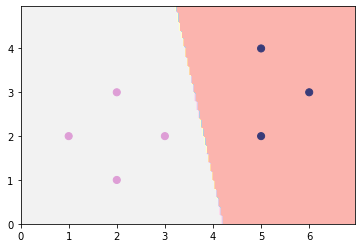

In [5]:
# Vaš kôd ovdje
model = RidgeClassifier(alpha = 0)
model.fit(seven_X, seven_y)
print(accuracy_score(seven_y, model.predict(seven_X)))
plot_2d_clf_problem(seven_X, seven_y, h = lambda x : model.predict(x))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.0


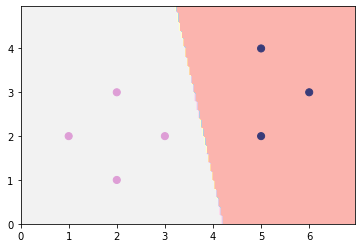

In [6]:
# Vaš kôd ovdje
linear_model = LinearRegression()
linear_model.fit(seven_X, seven_y)
print(accuracy_score(seven_y, linear_model.predict(seven_X) >= 0.5))
plot_2d_clf_problem(seven_X, seven_y, h = lambda x : model.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


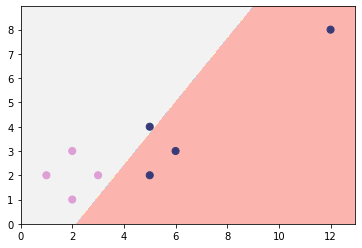

In [8]:
# Vaš kôd ovdje
linear_model = RidgeClassifier(alpha = 0)
linear_model.fit(outlier_X, outlier_y)
print(accuracy_score(outlier_y, linear_model.predict(outlier_X)))
plot_2d_clf_problem(outlier_X, outlier_y, h = lambda x : linear_model.predict(x))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [7]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


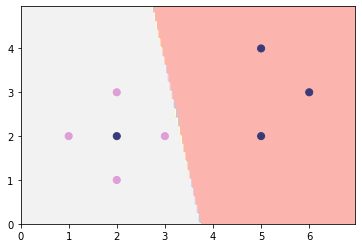

In [10]:
# Vaš kôd ovdje
linear_model = RidgeClassifier(alpha = 0)
linear_model.fit(unsep_X, outlier_y)
print(accuracy_score(unsep_y, linear_model.predict(unsep_X)))
plot_2d_clf_problem(unsep_X, unsep_y, h = lambda x : linear_model.predict(x))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

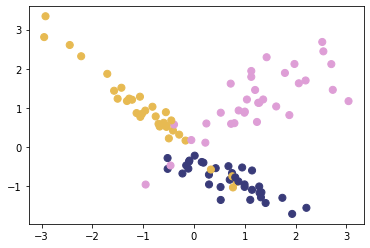

In [63]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

0.94


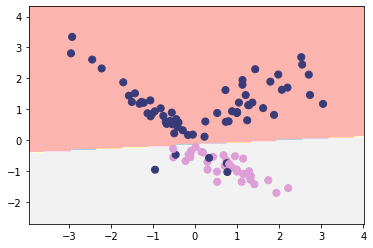

0.91


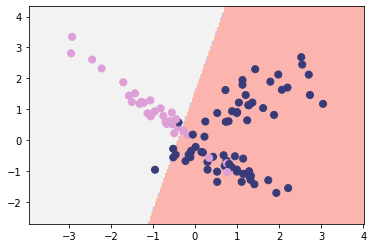

0.91


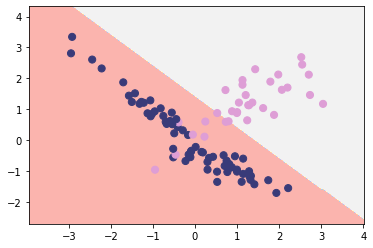

0.9


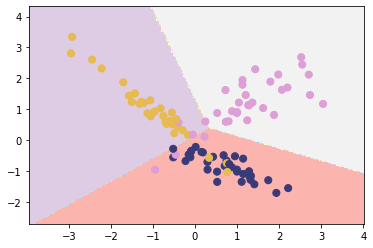

0.9


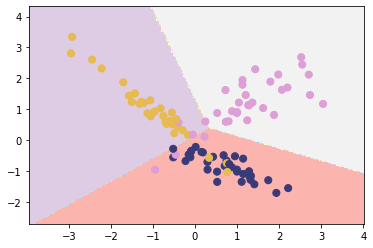

In [78]:
# h1
y1 = np.copy(y)
y1[y1 == 0] = 3
y1[y1 != 3] = 0
y1[y1 == 3] = 1
h1 = LinearRegression().fit(X, y1)
print(accuracy_score(y1, h1.predict(X) >= 0.5))
plot_2d_clf_problem(X, y1, h = lambda x : h1.predict(x) >= 0.5)
plt.show()

# h2
y2 = np.copy(y)
y2[y2 == 1] = 3
y2[y2 != 3] = 0
y2[y2 == 3] = 1
h2 = LinearRegression().fit(X, y2)
print(accuracy_score(y2, h2.predict(X) >= 0.5))
plot_2d_clf_problem(X, y2, h = lambda x : h2.predict(x) >= 0.5)
plt.show()

# h3
y3 = np.copy(y)
y3[y3 == 2] = 3
y3[y3 != 3] = 0
y3[y3 == 3] = 1
h3 = LinearRegression().fit(X, y3)
print(accuracy_score(y3, h3.predict(X) >= 0.5))
plot_2d_clf_problem(X, y3, h = lambda x : h3.predict(x) >= 0.5)
plt.show()

def predict(X):
    h1_predict = h1.predict(X)
    h2_predict = h2.predict(X)
    h3_predict = h3.predict(X)
    
    y = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        if h1_predict[i] > h2_predict[i]:
            if h1_predict[i] < h3_predict[i]:
                y[i] = 2
        else:
            if h2_predict[i] > h3_predict[i]:
                y[i] = 1
            else:
                y[i] = 2
    return y

print(accuracy_score(y, predict(X)))
plot_2d_clf_problem(X, y, h = predict)
plt.show()

h4 = RidgeClassifier(alpha = 0).fit(X, y)
print(accuracy_score(y, h4.predict(X)))
plot_2d_clf_problem(X, y, h = lambda x : h4.predict(x))
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

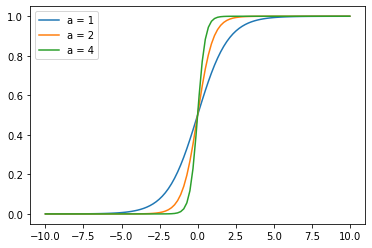

In [9]:
# Vaš kôd ovdje
def sigm(x, a = 1):
    return 1 / (1 + exp(-a * x))

xs = linspace(-10,10, 100)
plt.plot(xs, sigm(xs), label = "a = 1")
plt.plot(xs, sigm(xs, 2), label = "a = 2")
plt.plot(xs, sigm(xs, 4), label = "a = 4")
plt.legend(loc="best")
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [83]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x,w):
    return sigm(np.matmul(x, w))

def cross_entropy_error(X,y,w):
    return np.sum(-y * log(lr_h(X, w)) - (1 - y) * log(1 - lr_h(X, w)))/len(y)

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    # Vaš kôd ovdje
    fie = PolynomialFeatures(1).fit_transform(X)
    w = np.zeros(fie.shape[1])
    last_iter_error = cross_entropy_error(fie, y, w)
    w_all = []
    w_all.append(w)
    
    for i in range(max_iter):
        dw = np.zeros(fie.shape[1])

        h = lr_h(fie, w)
        dw -= np.matmul(np.transpose(fie), (h - y))
        
        w0 = w[0] + eta * dw[0]
        w = w * (1 - eta * alpha) + eta * dw
        w[0] = w0
        w_all.append(w)
        if abs(last_iter_error - cross_entropy_error(fie, y, w)) < epsilon:
            break
        last_iter_error = cross_entropy_error(fie, y, w)
    if trace:
        return w_all
    return w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

0.13521872720206746
[ 4.45449454 -1.71089242  0.68413507]


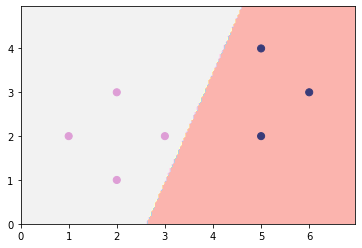

In [97]:
# Vaš kôd ovdje
w = lr_train(seven_X, seven_y)
print(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w))
print(w)
plot_2d_clf_problem(seven_X, seven_y, h = lambda x : lr_h(PolynomialFeatures(1).fit_transform(x), w) >= 0.5)
plt.show()

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [85]:
from sklearn.metrics import zero_one_loss

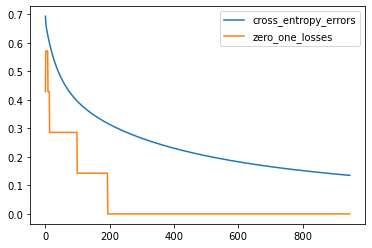

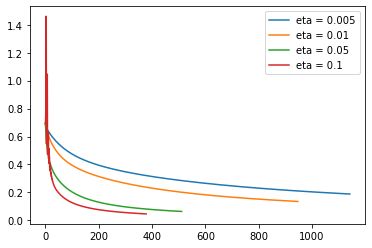

In [87]:
# Vaš kôd ovdje
w_all = lr_train(seven_X, seven_y, trace=True)
cross_entropy_errors = []
zero_one_losses = []
for w in w_all:
    cross_entropy_errors.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w))
    yd = np.zeros(len(seven_y))
    yd[lr_h(PolynomialFeatures(1).fit_transform(seven_X),w) >= 0.5] = 1
    zero_one_losses.append(zero_one_loss(seven_y, yd))
plt.plot(np.arange(0, len(cross_entropy_errors)), cross_entropy_errors, label = "cross_entropy_errors")
plt.plot(np.arange(0, len(cross_entropy_errors)), zero_one_losses, label = "zero_one_losses")
plt.legend(loc="best")
plt.show()


w_all_1 = lr_train(seven_X, seven_y, eta=0.005, trace=True)
w_all_2 = lr_train(seven_X, seven_y, eta=0.01, trace=True)
w_all_3 = lr_train(seven_X, seven_y, eta=0.05, trace=True)
w_all_4 = lr_train(seven_X, seven_y, eta=0.1, trace=True)
cross_entropy_errors_1 = []
cross_entropy_errors_2 = []
cross_entropy_errors_3 = []
cross_entropy_errors_4 = []

for i in range(len(w_all_1)):
    cross_entropy_errors_1.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w_all_1[i]))
for i in range(len(w_all_2)):
    cross_entropy_errors_2.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w_all_2[i]))
for i in range(len(w_all_3)):
    cross_entropy_errors_3.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w_all_3[i]))
for i in range(len(w_all_4)):
    cross_entropy_errors_4.append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w_all_4[i]))

plt.plot(np.arange(0, len(cross_entropy_errors_1)), cross_entropy_errors_1, label = "eta = 0.005")
plt.plot(np.arange(0, len(cross_entropy_errors_2)), cross_entropy_errors_2, label = "eta = 0.01")
plt.plot(np.arange(0, len(cross_entropy_errors_3)), cross_entropy_errors_3, label = "eta = 0.05")
plt.plot(np.arange(0, len(cross_entropy_errors_4)), cross_entropy_errors_4, label = "eta = 0.1")
plt.legend(loc="best")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

0.1388356793631562
[5.331296085368653, -1.1824441894808744, -0.3025192633521738]


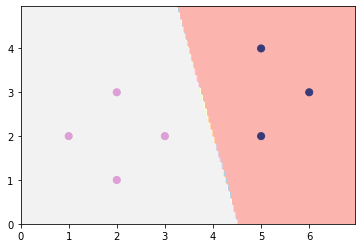

In [88]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
model_logistic = LogisticRegression().fit(seven_X, seven_y)

w = []
w = list(model_logistic.intercept_) + list(model_logistic.coef_[0])
print(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w))
print(w)
plot_2d_clf_problem(seven_X, seven_y, h = lambda x : lr_h(PolynomialFeatures(1).fit_transform(x), w) >= 0.5)
plt.show()

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

0.1214724656282494
[5.331629568222599, -1.1824968387001547, -0.30258672971410094]


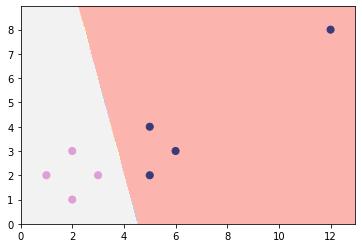

In [89]:
# Vaš kôd ovdje
model_logistic = LogisticRegression().fit(outlier_X, outlier_y)
w = []
w = list(model_logistic.intercept_) + list(model_logistic.coef_[0])
print(cross_entropy_error(PolynomialFeatures(1).fit_transform(outlier_X), outlier_y, w))
print(w)
plot_2d_clf_problem(outlier_X, outlier_y, h = lambda x : lr_h(PolynomialFeatures(1).fit_transform(x), w) >= 0.5)
plt.show()

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

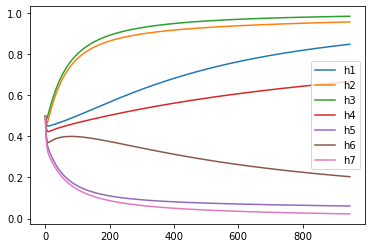

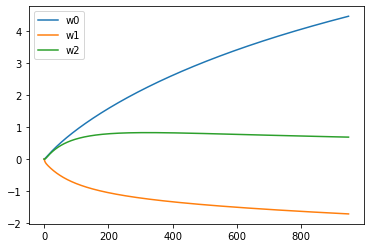

In [90]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures

w_all = lr_train(seven_X, seven_y, trace=True)
h_1 = []
h_2 = []
h_3 = []
h_4 = []
h_5 = []
h_6 = []
h_7 = []
for w in w_all:
    h = lr_h(PolynomialFeatures(1).fit_transform(seven_X), w)
    h_1.append(h[0])
    h_2.append(h[1])
    h_3.append(h[2])
    h_4.append(h[3])
    h_5.append(h[4])
    h_6.append(h[5])
    h_7.append(h[6])

plt.plot(np.arange(0, len(h_1)), h_1, label = "h1")
plt.plot(np.arange(0, len(h_1)), h_2, label = "h2")
plt.plot(np.arange(0, len(h_1)), h_3, label = "h3")
plt.plot(np.arange(0, len(h_1)), h_4, label = "h4")
plt.plot(np.arange(0, len(h_1)), h_5, label = "h5")
plt.plot(np.arange(0, len(h_1)), h_6, label = "h6")
plt.plot(np.arange(0, len(h_1)), h_7, label = "h7")
plt.legend(loc="best")
plt.show()

plt.plot(np.arange(0, len(w_all)), [w[0] for w in w_all], label = "w0")
plt.plot(np.arange(0, len(w_all)), [w[1] for w in w_all], label = "w1")
plt.plot(np.arange(0, len(w_all)), [w[2] for w in w_all], label = "w2")
plt.legend(loc="best")
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

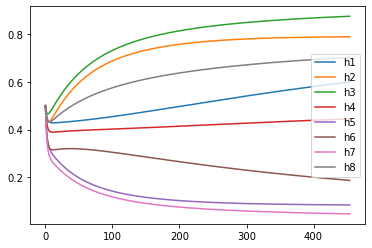

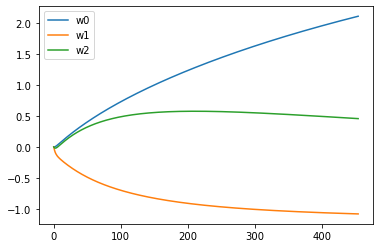

In [91]:
# Vaš kôd ovdje
w_all = lr_train(unsep_X, unsep_y, trace=True)
h_1 = []
h_2 = []
h_3 = []
h_4 = []
h_5 = []
h_6 = []
h_7 = []
h_8 = []
for w in w_all:
    h = lr_h(PolynomialFeatures(1).fit_transform(unsep_X), w)
    h_1.append(h[0])
    h_2.append(h[1])
    h_3.append(h[2])
    h_4.append(h[3])
    h_5.append(h[4])
    h_6.append(h[5])
    h_7.append(h[6])
    h_8.append(h[7])

plt.plot(np.arange(0, len(h_1)), h_1, label = "h1")
plt.plot(np.arange(0, len(h_1)), h_2, label = "h2")
plt.plot(np.arange(0, len(h_1)), h_3, label = "h3")
plt.plot(np.arange(0, len(h_1)), h_4, label = "h4")
plt.plot(np.arange(0, len(h_1)), h_5, label = "h5")
plt.plot(np.arange(0, len(h_1)), h_6, label = "h6")
plt.plot(np.arange(0, len(h_1)), h_7, label = "h7")
plt.plot(np.arange(0, len(h_1)), h_8, label = "h8")
plt.legend(loc="best")
plt.show()

plt.plot(np.arange(0, len(w_all)), [w[0] for w in w_all], label = "w0")
plt.plot(np.arange(0, len(w_all)), [w[1] for w in w_all], label = "w1")
plt.plot(np.arange(0, len(w_all)), [w[2] for w in w_all], label = "w2")
plt.legend(loc="best")
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [31]:
from numpy.linalg import norm

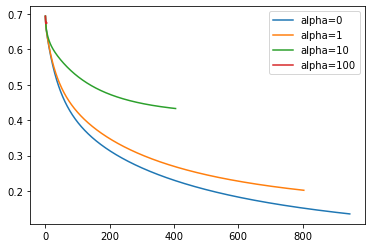

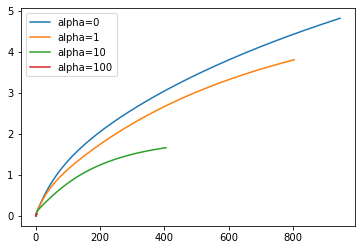

In [92]:
# Vaš kôd ovdje
alphas = [0, 1, 10, 100]
cross_entropy_errors = []
for i, alpha in enumerate(alphas):
    cross_entropy_errors.append([])
    w_all = lr_train(seven_X, seven_y, alpha=alpha, trace = True)
    for w in w_all:
        cross_entropy_errors[i].append(cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X), seven_y, w))
    plt.plot(np.arange(0, len(cross_entropy_errors[i])), cross_entropy_errors[i], label = "alpha=" + str(alpha))
plt.legend(loc="best")
plt.show()

L2s = []
for i, alpha in enumerate(alphas):
    cross_entropy_errors.append([])
    L2s.append([])
    w_all = lr_train(seven_X, seven_y, alpha=alpha, trace = True)
    for w in w_all:
        L2s[i].append(norm(w))
    plt.plot(np.arange(0, len(L2s[i])), L2s[i], label = "alpha=" + str(alpha))
plt.legend(loc="best")
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [93]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

0.08461608036167247


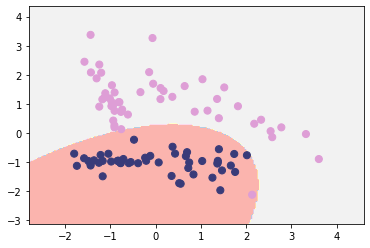

0.054147297571033245


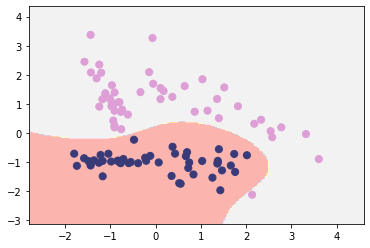

In [96]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
plot_2d_clf_problem(X, y)

fie2 = PolynomialFeatures(2).fit_transform(X)
model_logistic = LogisticRegression().fit(fie2, y)
w = []
w = np.array(list(model_logistic.intercept_) + list(model_logistic.coef_[0][1:]))
print(cross_entropy_error(fie2, y, w))
plot_2d_clf_problem(X, y, h = lambda x : model_logistic.predict(PolynomialFeatures(2).fit_transform(x)))
plt.show()

fie3 = PolynomialFeatures(3).fit_transform(X)
model_logistic = LogisticRegression().fit(fie3, y)
w = []
w = np.array(list(model_logistic.intercept_) + list(model_logistic.coef_[0][1:]))
print(cross_entropy_error(fie3, y, w))
plot_2d_clf_problem(X, y, h = lambda x : model_logistic.predict(PolynomialFeatures(3).fit_transform(x)))
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?